# SEGUNDO PROYECTO - TECNICAS DE APRENDIZAJE DE MAQUINA

Juan Soto - Rafael Torregroza - Andres Useche

# Segmentación de Clientes con K-Means y Árbol de Decisión

## Introducción

En el contexto empresarial, comprender el comportamiento de los clientes es fundamental para diseñar estrategias efectivas de marketing, personalización de productos etc. La segmentación de clientes es una técnica que permite dividir un conjunto de usuarios en grupos con características similares, facilitando la toma de decisiones informadas dentro de la misma empresa.

El objetivo de este taller es aplicar técnicas de aprendizaje no supervisado (K-Means) para identificar segmentos de clientes a partir de sus características, y posteriormente utilizar estos segmentos como etiquetas para entrenar un modelo supervisado de árbol de decisión que permita predecir el segmento al que pertenecería un nuevo cliente.

Este proceso implica el desarrollo de un pipeline completo que incluye: análisis exploratorio, preprocesamiento, aplicación de K-Means, entrenamiento de un modelo de clasificación y análisis de resultados(aqui esta el documento del proceso).


In [1]:
# Importación de librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general de estilo
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv("dataset_proyecto_2.csv")

#  Vista general de los datos
print("Primeras filas del dataset:")
display(df.head())


Primeras filas del dataset:


,edad,ingresos_anuales,cantidad_compras,valor_promedio_compra,frecuencia_compras_mensual,dispositivo_utilizado,fuente_trafico,dias_desde_ultima_compra,valor_total_gastado,satisfaccion_cliente,metodo_pago,participacion_programa_lealtad,productos_adquiridos
0,28,90455,4,135,0.921436,tablet,redes sociales,230,3369,2.929789,tarjeta crédito,0,computadoras
1,35,55842,19,367,5.321630,móvil,búsqueda orgánica,17,8276,3.446550,tarjeta crédito,1,accesorios
2,30,23268,39,257,9.021315,móvil,búsqueda orgánica,13,2216,4.034947,tarjeta crédito,0,accesorios
3,35,60841,8,862,2.865878,móvil,búsqueda orgánica,72,8003,3.466717,paypal,0,electrodomésticos
4,25,100485,19,444,7.365862,móvil,redes sociales,57,8550,4.310355,paypal,1,móviles


In [2]:
print("\nInformación general del dataset:")
df.info()

print("\nEstadísticas descriptivas:")
display(df.describe())

print("\nRevisión de valores nulos:")
display(df.isnull().sum())



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833331 entries, 0 to 1833330
Data columns (total 13 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   edad                            int64  
 1   ingresos_anuales                int64  
 2   cantidad_compras                int64  
 3   valor_promedio_compra           int64  
 4   frecuencia_compras_mensual      float64
 5   dispositivo_utilizado           object 
 6   fuente_trafico                  object 
 7   dias_desde_ultima_compra        int64  
 8   valor_total_gastado             int64  
 9   satisfaccion_cliente            float64
 10  metodo_pago                     object 
 11  participacion_programa_lealtad  int64  
 12  productos_adquiridos            object 
dtypes: float64(2), int64(7), object(4)
memory usage: 181.8+ MB

Estadísticas descriptivas:


,edad,ingresos_anuales,cantidad_compras,valor_promedio_compra,frecuencia_compras_mensual,dias_desde_ultima_compra,valor_total_gastado,satisfaccion_cliente,participacion_programa_lealtad
count,1.833331e+06,1.833331e+06,1.833331e+06,1.833331e+06,1.833331e+06,1.833331e+06,1.833331e+06,1.833331e+06,1.833331e+06
mean,3.877552e+01,7.614756e+04,1.408932e+01,4.301820e+02,5.487638e+00,9.651723e+01,7.045614e+03,3.761349e+00,4.636860e-01
std,1.358327e+01,4.419407e+04,1.182157e+01,3.086627e+02,4.209958e+00,1.065618e+02,6.204356e+03,7.281546e-01,4.986797e-01
min,1.800000e+01,1.000000e+04,1.000000e+00,5.000000e+01,2.000125e-01,1.000000e+00,1.000000e+03,2.000002e+00,0.000000e+00
25%,2.900000e+01,4.131500e+04,4.000000e+00,1.960000e+02,1.235148e+00,1.200000e+01,2.944000e+03,3.220253e+00,0.000000e+00
50%,3.500000e+01,6.750700e+04,9.000000e+00,3.610000e+02,5.749663e+00,4.500000e+01,4.606000e+03,3.823675e+00,0.000000e+00
75%,4.700000e+01,1.078480e+05,2.100000e+01,5.400000e+02,9.280341e+00,1.640000e+02,8.770000e+03,4.348068e+00,1.000000e+00
max,6.900000e+01,1.999990e+05,4.900000e+01,1.499000e+03,1.499999e+01,3.640000e+02,2.999900e+04,5.000000e+00,1.000000e+00



Revisión de valores nulos:


,0
edad,0
ingresos_anuales,0
cantidad_compras,0
valor_promedio_compra,0
frecuencia_compras_mensual,0
dispositivo_utilizado,0
fuente_trafico,0
dias_desde_ultima_compra,0
valor_total_gastado,0
satisfaccion_cliente,0


## informacion general del Dataset

El dataset contiene 1833331 datos y 13 columnas en donde se observa que no hay valores nulos para ninguna columna

# Visualización y análisis de las caracteriısticas del dataset.

Graficos de distribución de las varibles

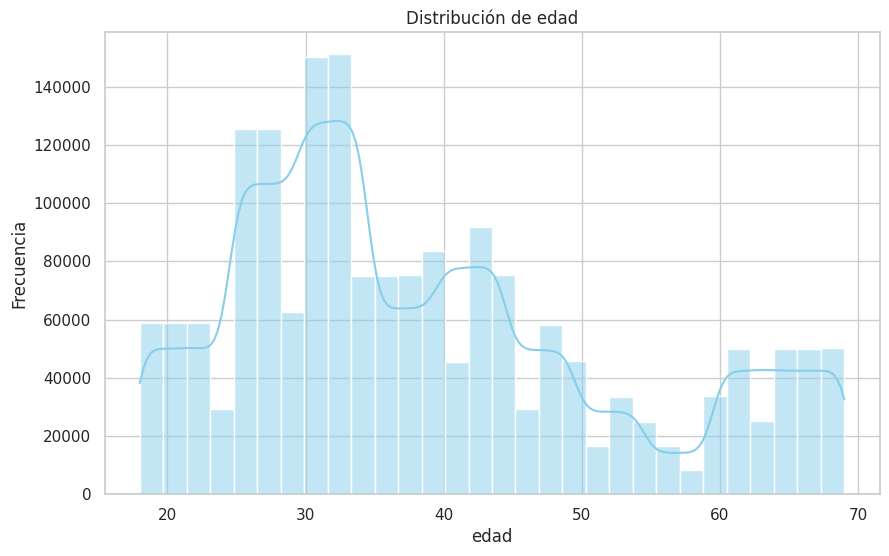

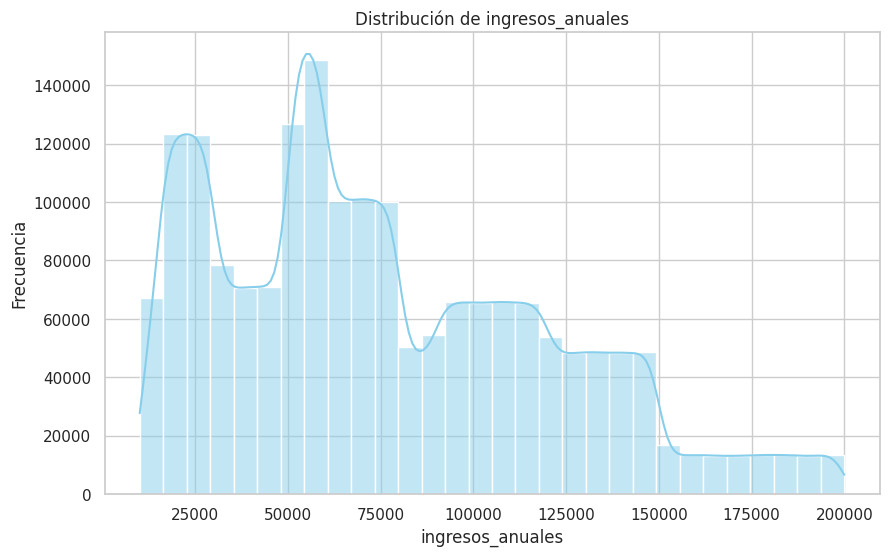

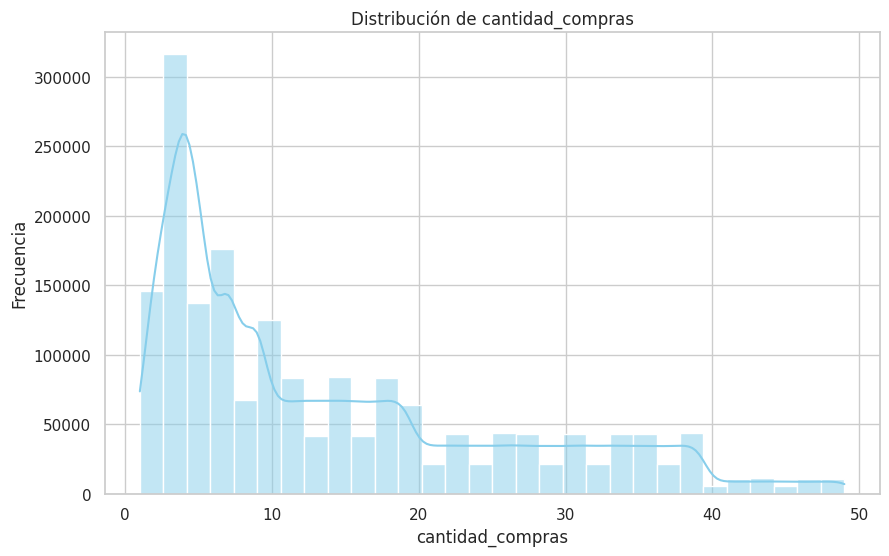

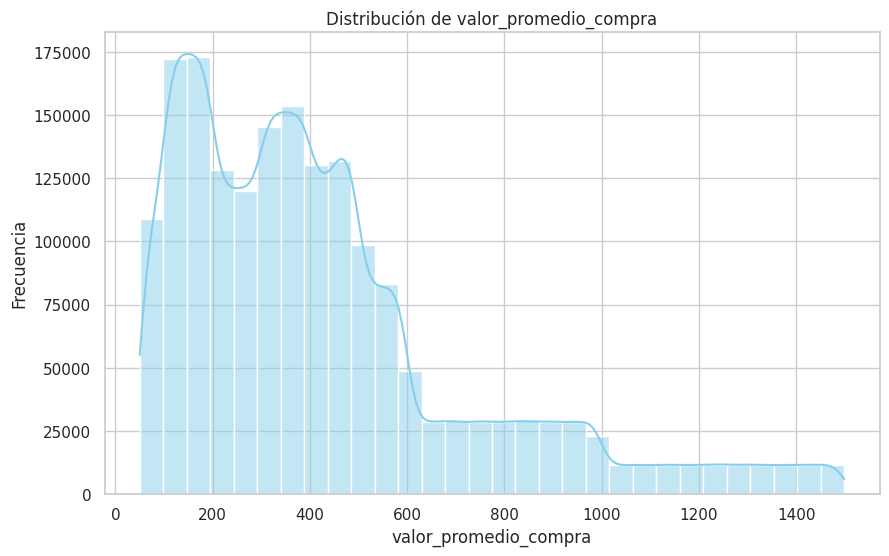

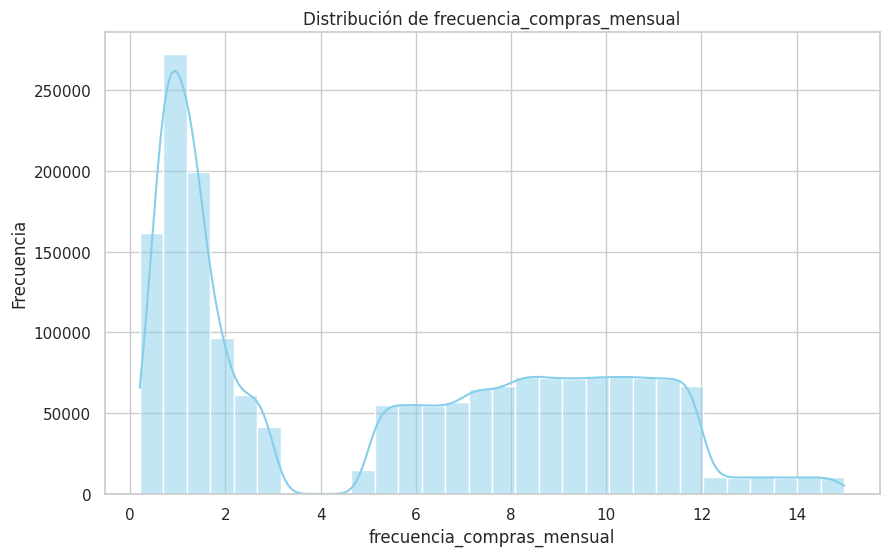

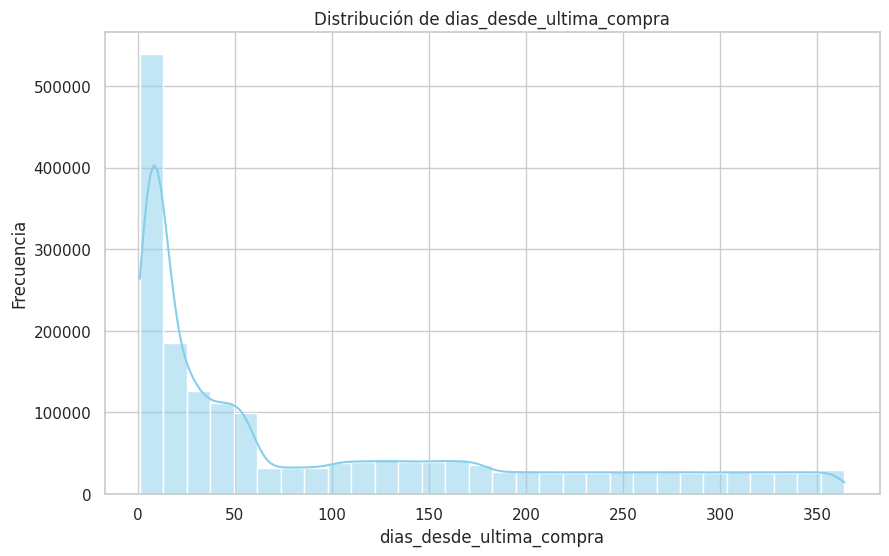

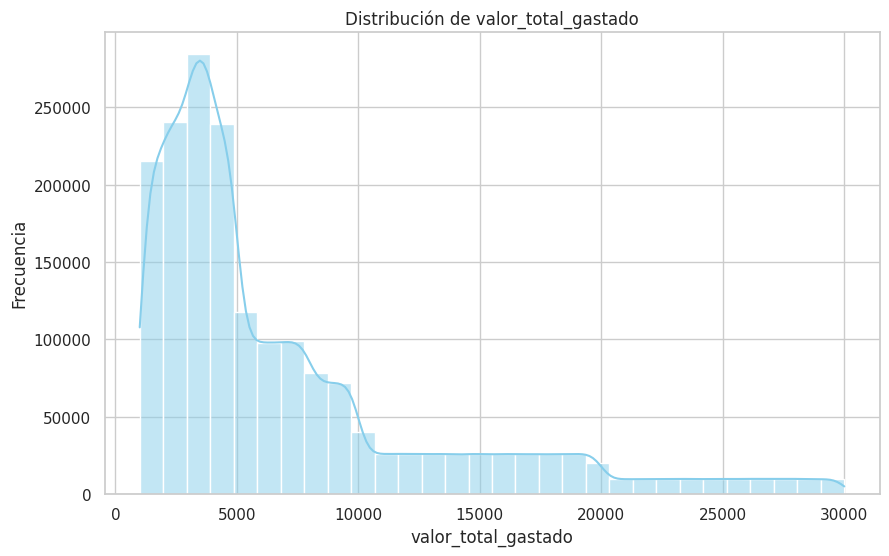

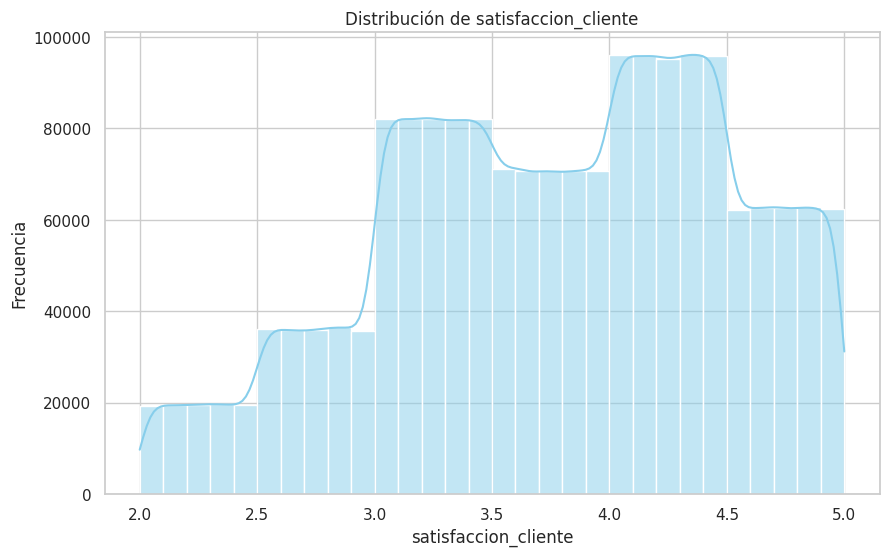

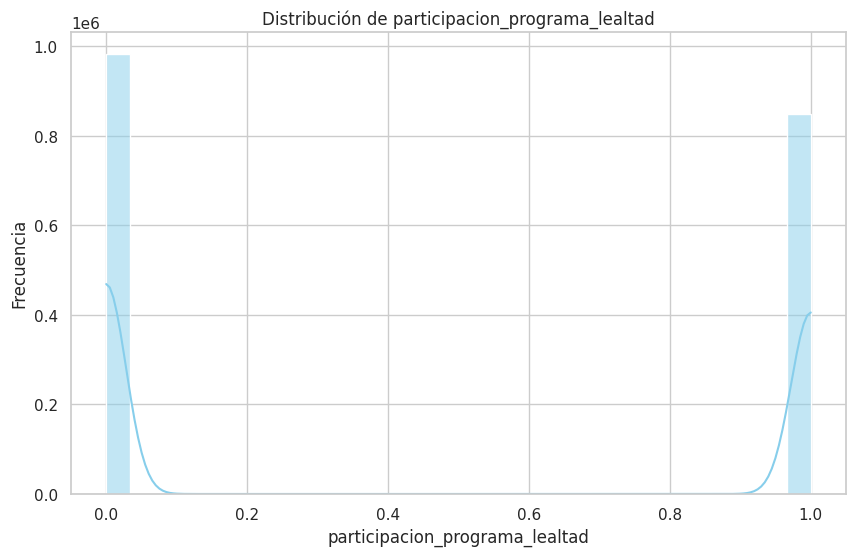

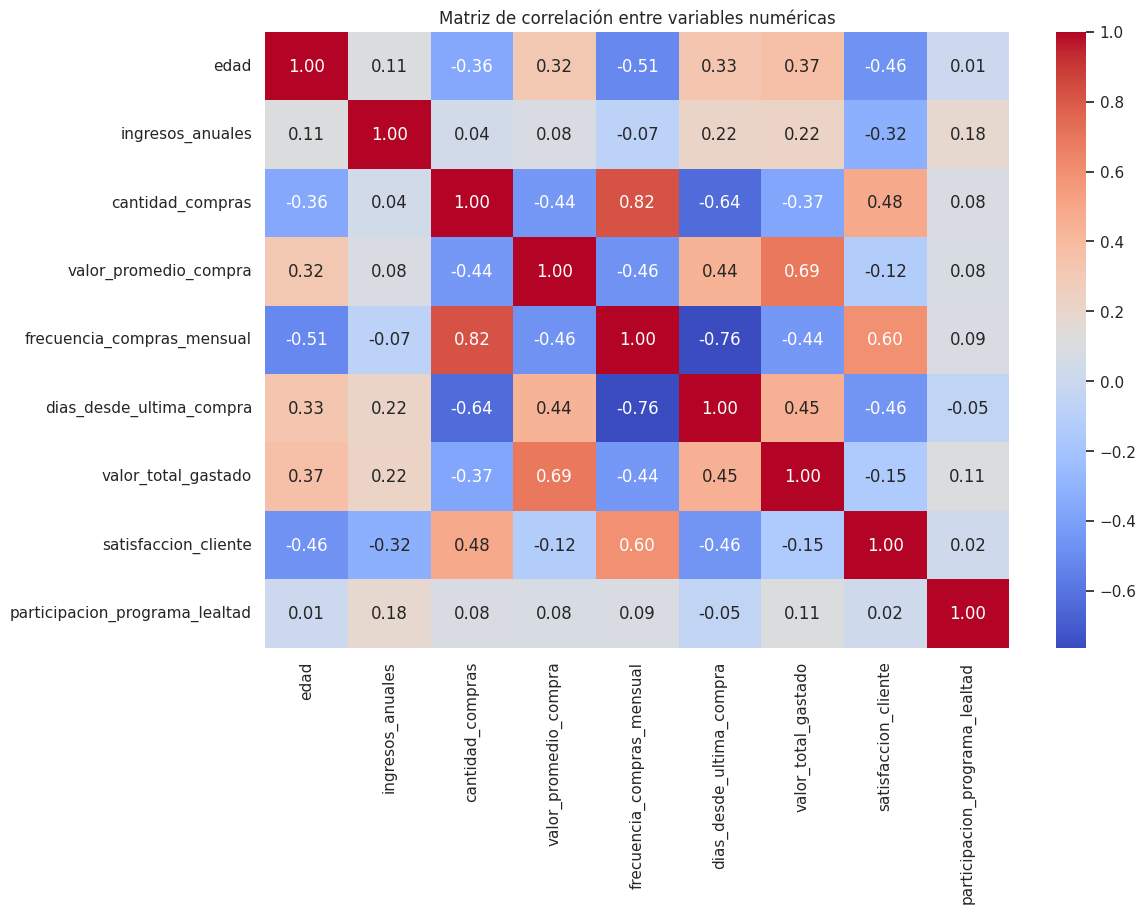

In [3]:
# Distribución de variables numéricas
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

#  Matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()


<ipython-input-23-44475fe80f6c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


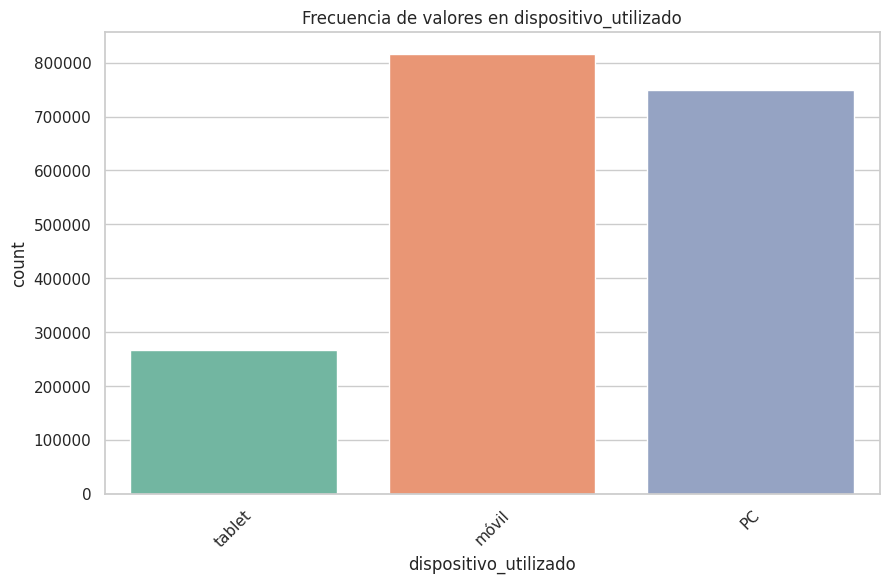

<ipython-input-23-44475fe80f6c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


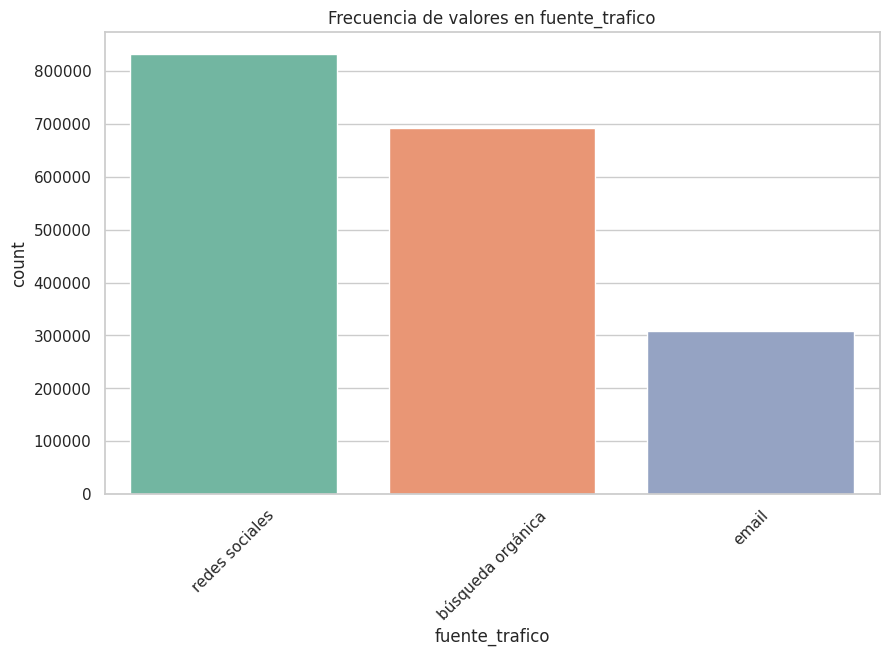

<ipython-input-23-44475fe80f6c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


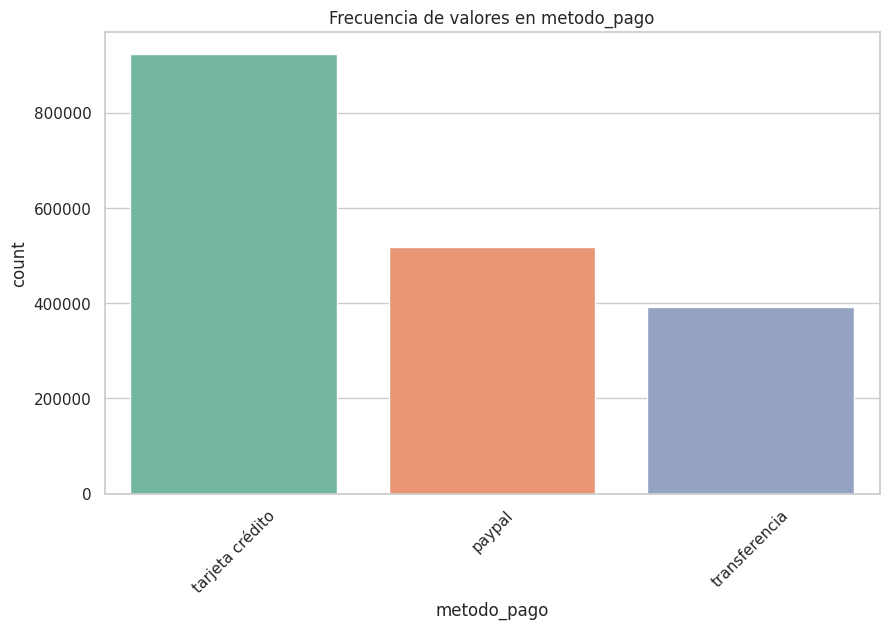

<ipython-input-23-44475fe80f6c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


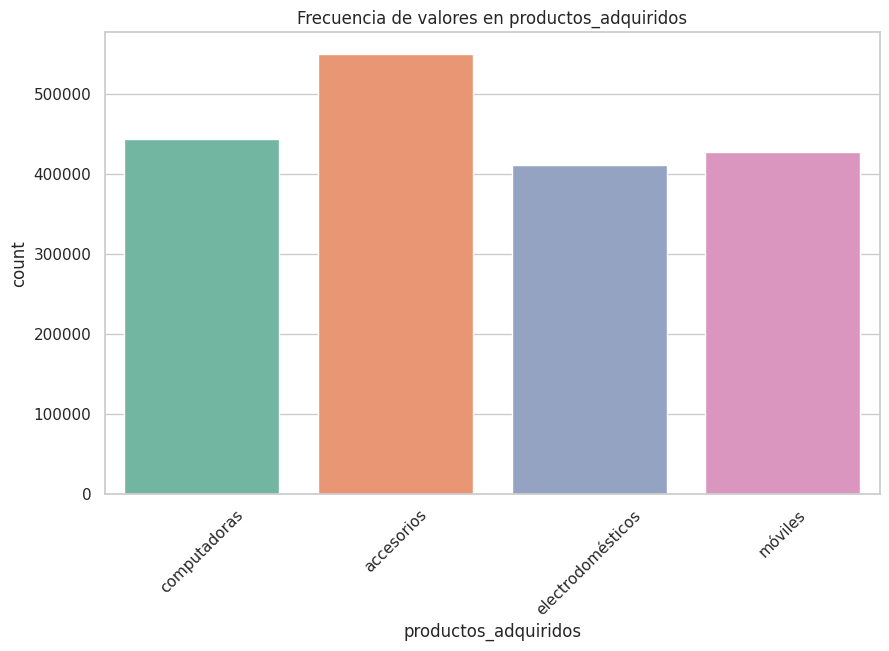

In [23]:
#  Conteo de valores por variable categórica
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Frecuencia de valores en {col}')
    plt.xticks(rotation=45)
    plt.show()


Deteción de outliers

In [24]:
# Función para detectar outliers usando el rango intercuartílico (IQR)
def detectar_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    return outliers

#  Revisar columnas con posibles outliers
for col in numeric_cols:
    outliers = detectar_outliers(col)
    print(f"{col} → {len(outliers)} outliers detectados")


edad → 0 outliers detectados
ingresos_anuales → 0 outliers detectados
cantidad_compras → 16663 outliers detectados
valor_promedio_compra → 105908 outliers detectados
frecuencia_compras_mensual → 0 outliers detectados
dias_desde_ultima_compra → 0 outliers detectados
valor_total_gastado → 166479 outliers detectados
satisfaccion_cliente → 0 outliers detectados
participacion_programa_lealtad → 0 outliers detectados


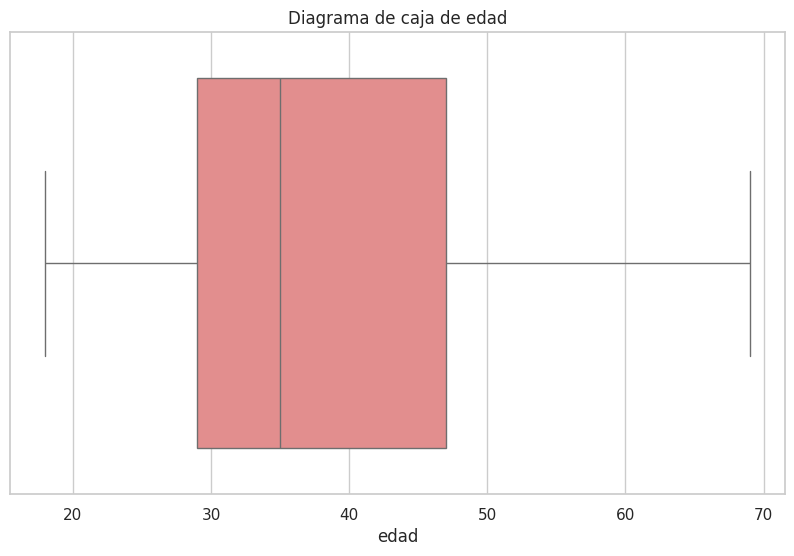

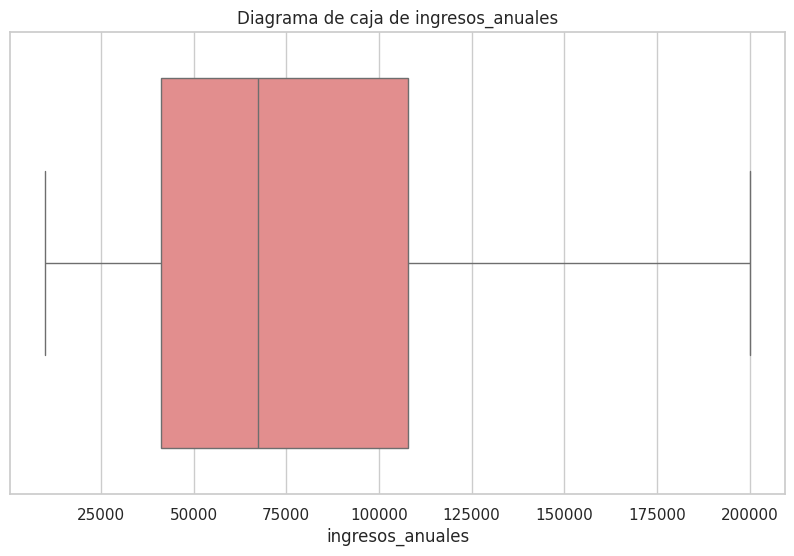

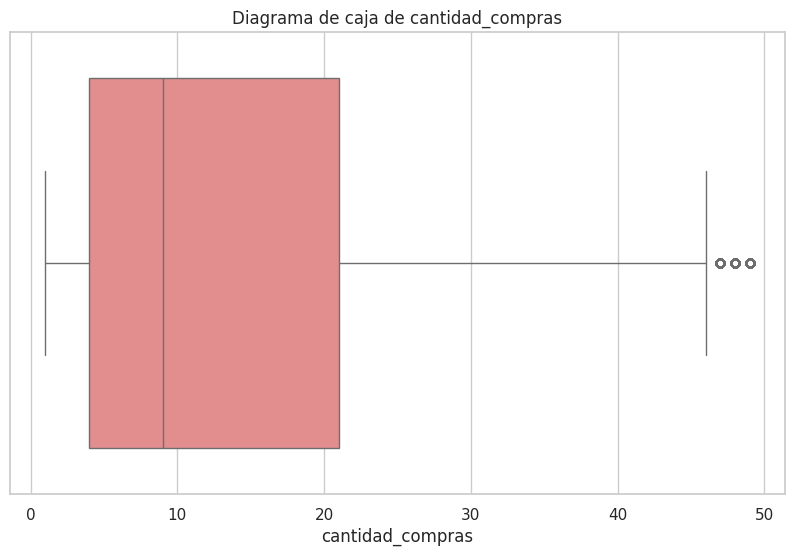

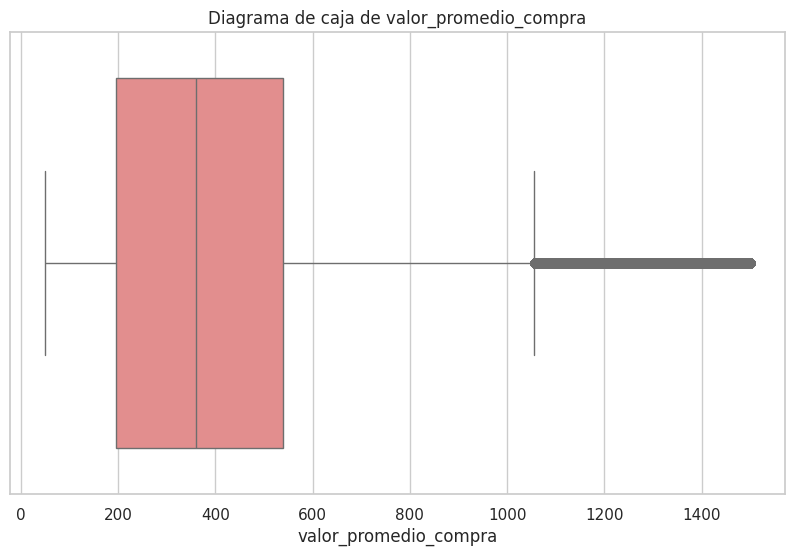

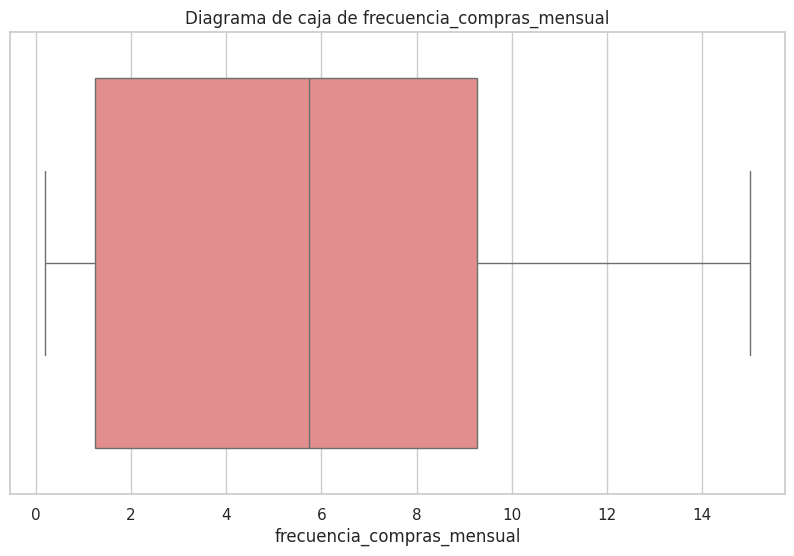

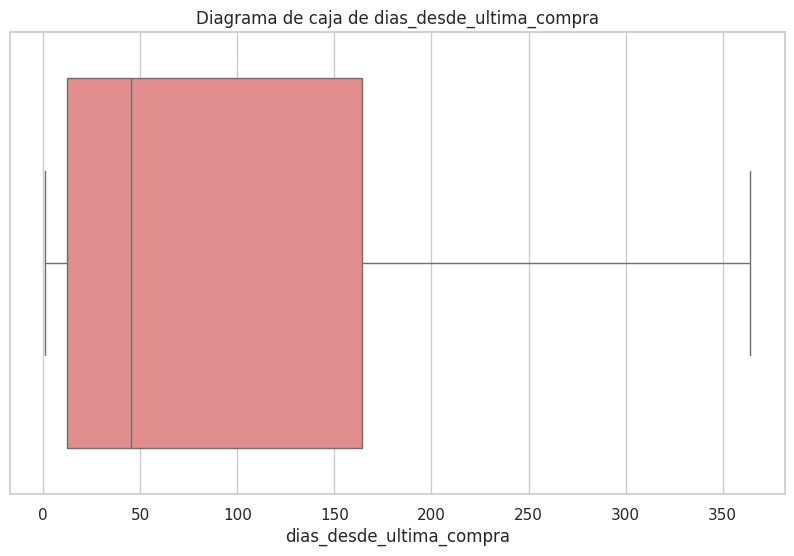

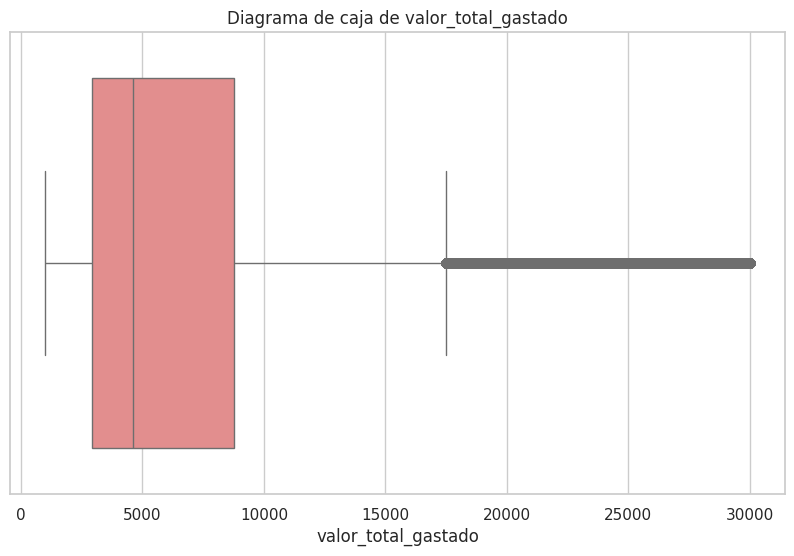

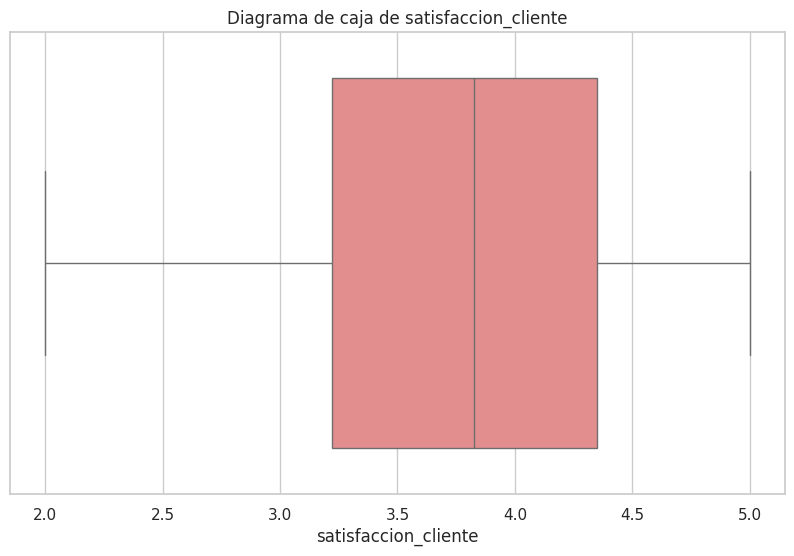

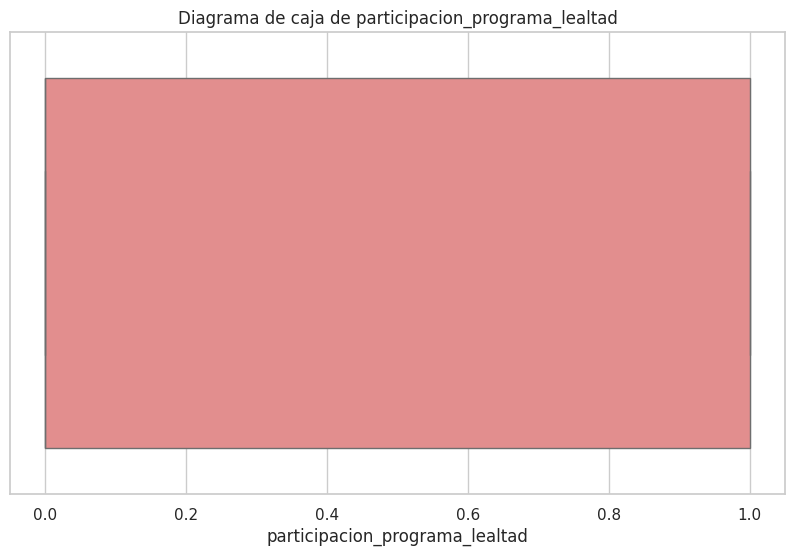

In [25]:
# Diagramas de caja para detectar outliers
for col in numeric_cols:
    plt.figure()
    sns.boxplot(data=df, x=col, color='lightcoral')
    plt.title(f'Diagrama de caja de {col}')
    plt.xlabel(col)
    plt.show()


##Correlaciones

- Existen variables con alta o muy elevada correlación con otras variables como lo son:
1. la variable frecuencia_pago_mensual con la variable cantidad_compras con una
 correlación de 0.82
2. Dias_desde_ultima_compra con la variable frecuencia_compras_mensual con una correlación de -0.76
3. Valor promedio compra con la variable valor_total_gastado con una correlación de 0.69

En algunos casos se eliminaria una de las dos variables ya que aportarian  información muyt parecida al modelo, lo cual es redundandante. Sin embargo como el objetivo es obtener una segmentación de clientes, existen variables que al ser eliminadas pueden afectar el modelo a la hora de hacer la segmentación.

En este caso las variables anteriormente mencionadas, se consideran importantes para el modelo a pesar de tener una alta correlación por lo tanto permaneceran en el dataset.



##Interpretación por variable:

- cantidad_compras: El hecho de que haya más de 16 mil valores considerados outliers sugiere que esta variable tiene una distribución asimétrica. Puede haber usuarios muy activos con muchísimas compras frente a una mayoría con pocas compras.

- valor_promedio_compra y valor_total_gastado: Estas variables relacionadas con gasto también presentan una gran cantidad de outliers, lo cual es esperado en comportamiento de clientes ya que hay unos pocos clientes que gastan muchísimo más que la mayoría de los clientes



#Transformacion de variables numericas


- StandardScaler = (Estandarización)	Cuando los datos son aproximadamente normales (media ≈ mediana lo que puede varias mucho con los datos).
- RobustScaler	= Cuando hay outliers que no se quiere eliminar.
- MinMaxScaler = (Normalización)	Cuando se necesita llevar todo a un rango entre 0 y 1. Ideal si no hay outliers fuertes.(en este caso no porque se debe trabajar con todas las caracteristicas de los usuarios)

como no se quiere eliminar los valores atipicos ya que pueden contener informacion de usuarios importantes usaremos RobustScaler

Se elimina la variable metodo de pago, ya que es indiferente saber como un cliente paga sus compras para el objetivo del análisis

In [4]:
df = df.drop(columns=['metodo_pago'])

In [5]:
from sklearn.preprocessing import RobustScaler

#  Selección de columnas numéricas
numeric_cols = df.select_dtypes(include=np.number).columns

#  Inicializar el escalador para los datos
scaler = RobustScaler()

#  Aplicar la transformación
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

#  Verificación rápida
print("Valores transformados:")
display(df_scaled[numeric_cols].describe())


Valores transformados:


,edad,ingresos_anuales,cantidad_compras,valor_promedio_compra,frecuencia_compras_mensual,dias_desde_ultima_compra,valor_total_gastado,satisfaccion_cliente,participacion_programa_lealtad
count,1.833331e+06,1.833331e+06,1.833331e+06,1.833331e+06,1.833331e+06,1.833331e+06,1.833331e+06,1.833331e+06,1.833331e+06
mean,2.097512e-01,1.298687e-01,2.993718e-01,2.011105e-01,-3.256915e-02,3.389291e-01,4.187460e-01,-5.526296e-02,4.636860e-01
std,7.546260e-01,6.642428e-01,6.953864e-01,8.972752e-01,5.232886e-01,7.010646e-01,1.064943e+00,6.456327e-01,4.986797e-01
min,-9.444444e-01,-8.643380e-01,-4.705882e-01,-9.040698e-01,-6.898095e-01,-2.894737e-01,-6.189495e-01,-1.616996e+00,0.000000e+00
25%,-3.333333e-01,-3.936693e-01,-2.941176e-01,-4.796512e-01,-5.611443e-01,-2.171053e-01,-2.852729e-01,-5.350367e-01,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.666667e-01,6.063307e-01,7.058824e-01,5.203488e-01,4.388557e-01,7.828947e-01,7.147271e-01,4.649633e-01,1.000000e+00
max,1.888889e+00,1.991373e+00,2.352941e+00,3.308140e+00,1.149796e+00,2.098684e+00,4.358565e+00,1.043011e+00,1.000000e+00


Dado que algunas variables presentan valores atípicos significativos (especialmente `cantidad_compras`, `valor_promedio_compra` y `valor_total_gastado`), se optó por aplicar `RobustScaler` para normalizar los datos.

Este método utiliza la mediana y el rango intercuartílico (IQR) en lugar de la media y desviación estándar, lo que lo hace más robusto frente a valores extremos. El resultado es que todas las variables numéricas quedan centradas en cero y con una escala comparable (50%), lo cual es fundamental para el correcto funcionamiento del algoritmo K-Means que se aplicará más adelante.


In [6]:
# Buscar columnas categóricas (tipo object o category)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Mostrar las columnas categóricas y sus valores únicos
for col in categorical_cols:
    print(f"Columna: {col}")
    print(df[col].value_counts(dropna=False))
    print("-" * 40)


Columna: dispositivo_utilizado
dispositivo_utilizado
móvil     816668
PC        749773
tablet    266890
Name: count, dtype: int64
----------------------------------------
Columna: fuente_trafico
fuente_trafico
redes sociales       832466
búsqueda orgánica    692714
email                308151
Name: count, dtype: int64
----------------------------------------
Columna: productos_adquiridos
productos_adquiridos
accesorios           550132
computadoras         444056
móviles              427799
electrodomésticos    411344
Name: count, dtype: int64
----------------------------------------


In [7]:
# Codificación One-Hot Encoding

categorical_cols = ['dispositivo_utilizado', 'fuente_trafico' , 'productos_adquiridos']

# Aplicar la codificación al dataset escalado
df_final = pd.get_dummies(df_scaled, columns=categorical_cols, drop_first=True)

# Verificar la nueva forma del dataset
print("Dimensiones del dataset final:")
print(df_final.shape)

# Verificar algunas columnas nuevas
print("Columnas codificadas categoticas a dummy:")
print([col for col in df_final.columns if any(prefix in col for prefix in categorical_cols)])

#Variables finales
print("Variables finales:")
print(df_final.columns)

#muestra del datset
df_final.head()

Dimensiones del dataset final:
(1833331, 16)
Columnas codificadas categoticas a dummy:
['dispositivo_utilizado_móvil', 'dispositivo_utilizado_tablet', 'fuente_trafico_email', 'fuente_trafico_redes sociales', 'productos_adquiridos_computadoras', 'productos_adquiridos_electrodomésticos', 'productos_adquiridos_móviles']
Variables finales:
Index(['edad', 'ingresos_anuales', 'cantidad_compras', 'valor_promedio_compra',
       'frecuencia_compras_mensual', 'dias_desde_ultima_compra',
       'valor_total_gastado', 'satisfaccion_cliente',
       'participacion_programa_lealtad', 'dispositivo_utilizado_móvil',
       'dispositivo_utilizado_tablet', 'fuente_trafico_email',
       'fuente_trafico_redes sociales', 'productos_adquiridos_computadoras',
       'productos_adquiridos_electrodomésticos',
       'productos_adquiridos_móviles'],
      dtype='object')


,edad,ingresos_anuales,cantidad_compras,valor_promedio_compra,frecuencia_compras_mensual,dias_desde_ultima_compra,valor_total_gastado,satisfaccion_cliente,participacion_programa_lealtad,dispositivo_utilizado_móvil,dispositivo_utilizado_tablet,fuente_trafico_email,fuente_trafico_redes sociales,productos_adquiridos_computadoras,productos_adquiridos_electrodomésticos,productos_adquiridos_móviles
0,-0.388889,0.344912,-0.294118,-0.656977,-0.600138,1.217105,-0.212324,-0.792582,0.0,False,True,False,True,True,False,False
1,0.000000,-0.175327,0.588235,0.017442,-0.053204,-0.184211,0.629935,-0.334386,1.0,True,False,False,False,False,False,False
2,-0.277778,-0.664918,1.764706,-0.302326,0.406659,-0.210526,-0.410230,0.187328,0.0,True,False,False,False,False,False,False
3,0.000000,-0.100191,-0.058824,1.456395,-0.358448,0.177632,0.583076,-0.316504,0.0,True,False,False,False,False,True,False
4,-0.555556,0.495664,0.588235,0.241279,0.200890,0.078947,0.676965,0.431524,1.0,True,False,False,True,False,False,True



- No se incluye metodo de pago, ya que es indiferente como paga un cliente.
- Todas son variables nominales (no tienen un orden lógico entre categorías).

- K-Means requiere variables numéricas, y asignar números directos (Label Encoding) sería incorrecto porque implicaría un orden inexistente.

- Usar One-Hot Encoding convertirá cada categoría en una columna binaria (0 o 1), sin sesgos y para despues crear dummies asi se evitaria la multicolinealidad

Valores de Inercia (Método del Codo):
k=2: 432138.4317778101
k=3: 348008.42770581116
k=4: 310404.03518603527
k=5: 276103.11799443857
k=6: 244907.94925105726
k=7: 219283.35161583553

Valores de Silhouette Score:
k=2: 0.3103828165452419
k=3: 0.2811575645243725
k=4: 0.2237825691727079
k=5: 0.2603824272571581
k=6: 0.27226391801365124
k=7: 0.2644976457586613


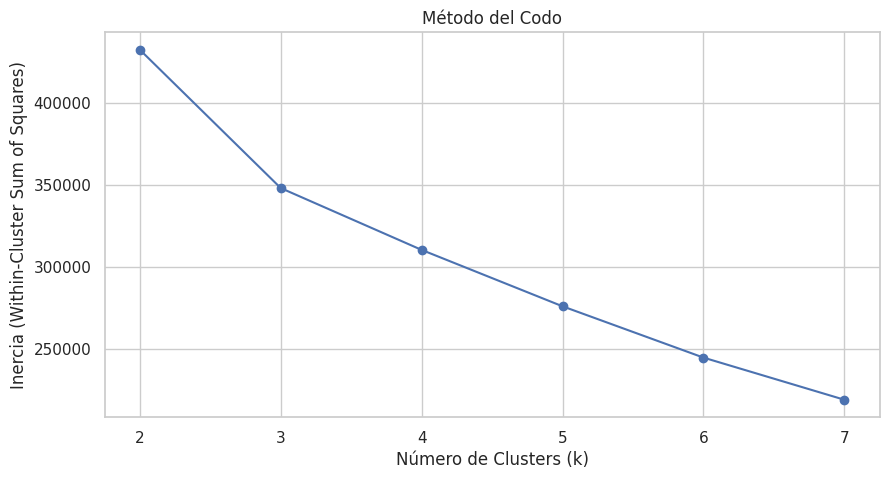

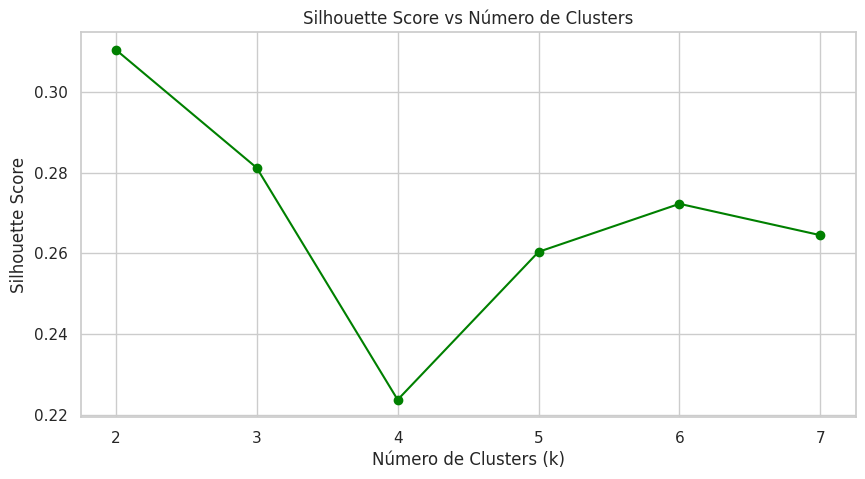

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# Tomar una muestra del dataset para agilizar el proceso
df_sample = df_final.sample(n=100000, random_state=42)

# Probar distintos valores de k
k_values = range(2, 8)
inertias = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_sample)
    inertias.append(kmeans.inertia_)

    # Calcular silhouette score solo si k > 1
    score = silhouette_score(df_sample, kmeans.labels_)
    silhouette_scores.append(score)

# Imprimir valores numéricos obtenidos
print("Valores de Inercia (Método del Codo):")
for k, inertia in zip(k_values, inertias):
    print(f"k={k}: {inertia}")

print("\nValores de Silhouette Score:")
for k, score in zip(k_values, silhouette_scores):
    print(f"k={k}: {score}")

# Gráfico del método del codo
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertias, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

# Gráfico del Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score vs Número de Clusters")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


##Análisis del Método del Codo (Gráfica superior)
- Hay una disminución fuerte de la inercia entre k = 2 y k = 4.

- A partir de k = 5, la reducción es más suave, lo que indica que el "codo" está cerca de k = 4.

 Posible valor óptimo de k por codo: k = 4



##Análisis del Silhouette Score (Gráfica inferior)
Para determinar que tan bien  los clusters están separados y si los datos dentro de cada cluster son compactos.
- El mejor score es claramente en k = 2 (~0.30).

- El segundo mejor valor está entre k = 3 y k = 8, pero ninguno supera a k = 2.

se observa que en k = 4 el Silhouette cae significativamente (~0.21), lo cual indica poca cohesión y separación entre clusters de la base de datos

 Mejor valor de k por Silhouette Score: k = 2



El numero de clusters para realizar el modelo K-means va hacer K = 4, sin embargo más adelante aremos la prueba con k=6, ya que con k=6 la pendiente de la inercia baja mas(es un poco mas pronunciada), por lo tanto es bueno realizar un analisis sobre esto.

In [39]:
from sklearn.cluster import KMeans

# Aplicar K-Means al dataset completo
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_final.fit(df_final)

# Añadir los clusters como etiquetas
df_final['cluster'] = kmeans_final.labels_


In [10]:
# Conteo de instancias por cluster
cluster_counts = df_final['cluster'].value_counts()
print("Distribución de instancias por cluster:")
print(cluster_counts)


Distribución de instancias por cluster:
cluster
1    507248
2    504937
3    435736
0    385410
Name: count, dtype: int64


In [11]:
# Media de cada variable por cluster
cluster_profiles = df_final.groupby('cluster').mean(numeric_only=True)
display(cluster_profiles)


,edad,ingresos_anuales,cantidad_compras,valor_promedio_compra,frecuencia_compras_mensual,dias_desde_ultima_compra,valor_total_gastado,satisfaccion_cliente,participacion_programa_lealtad,dispositivo_utilizado_móvil,dispositivo_utilizado_tablet,fuente_trafico_email,fuente_trafico_redes sociales,productos_adquiridos_computadoras,productos_adquiridos_electrodomésticos,productos_adquiridos_móviles
cluster,,,,,,,,,,,,,,,,
0,0.633482,0.039169,-0.291355,-0.284281,-0.583834,0.843133,-0.210542,-0.745222,0.263896,0.138868,0.312903,0.364557,0.279090,0.365346,0.189074,0.143024
1,-0.497341,-0.445462,0.873786,-0.245047,0.521763,-0.243951,-0.271318,0.596027,0.398474,0.801854,0.000246,0.000000,0.799767,0.002969,0.098747,0.304338
2,0.163256,0.635196,0.642536,-0.049765,0.263097,-0.092406,0.251738,-0.059110,0.637529,0.621208,0.147581,0.000024,0.557933,0.275100,0.115850,0.432333
3,0.711977,0.294266,-0.244478,1.440539,-0.532904,1.071338,1.972201,-0.198712,0.514865,0.098080,0.164434,0.384717,0.086064,0.373699,0.527583,0.000000


Interpretación de los Clusters (k = 4)
 Distribución de clientes por cluster:

Cluster 0: 385,410 clientes

Cluster 1: 507,248 clientes

Cluster 2: 504,937 clientes

Cluster 3: 435,736 clientes

 Descripción de cada cluster

Cluster 0 – “Clientes de baja frecuencia y baja satisfacción”
Edad: Relativamente alta

Ingresos: Bajos

Compras: Bajas en cantidad y en valor promedio

Frecuencia: Baja, con muchas compras realizadas hace tiempo (+0.84 en días desde la última compra)

Otros datos: Baja satisfacción y lealtad media

Interpretación: Este grupo representa clientes con bajo poder adquisitivo y baja actividad de compra. Podrían beneficiarse de descuentos y estrategias de retención.

Cluster 1 – “Clientes jóvenes y recurrentes”
Edad: Más joven que el promedio

Ingresos: Moderados a bajos

Compras: Frecuentes, pero de bajo valor

Frecuencia: Alta

Otros datos: Alta satisfacción y fuerte uso de dispositivos móviles

Interpretación: Este grupo es muy activo, aunque gasta poco en cada compra. Son buenos candidatos para estrategias de fidelización y aumento del ticket promedio.

Cluster 2 – “Clientes con ingresos altos y compras diversificadas”
Edad: Intermedia

Ingresos: Más altos que el promedio

Compras: Alta cantidad, aunque con un valor por compra bajo

Frecuencia: Media

Otros datos: Alta participación en programas de lealtad

Interpretación: Estos clientes tienen buen poder adquisitivo y compran con frecuencia. Se pueden impulsar con promociones de mayor valor y estrategias de cross-selling.

Cluster 3 – “Compradores ocasionales con alto gasto”
Edad: Media-alta

Ingresos: Intermedios

Compras: Poco frecuentes, pero con un alto valor por compra (+1.44)

Frecuencia: Baja, con muchos días desde la última compra

Otros datos: Baja satisfacción

Interpretación: Este segmento representa compradores de alto valor que no compran con frecuencia. Pueden beneficiarse de programas VIP y estrategias de recompra.

 Conclusiones

Cluster 0: Clientes con baja actividad y satisfacción. Requieren estrategias de retención.

Cluster 1: Clientes frecuentes, aunque con compras de menor valor. Pueden aumentar su ticket promedio.

Cluster 2: Clientes con ingresos altos y buena actividad. Se pueden incentivar con ofertas exclusivas.

Cluster 3: Compradores ocasionales pero de alto valor. Requieren fidelización.

Estos resultados permiten diseñar estrategias de marketing más efectivas, enfocando esfuerzos en los segmentos con mayor potencial de conversión.



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


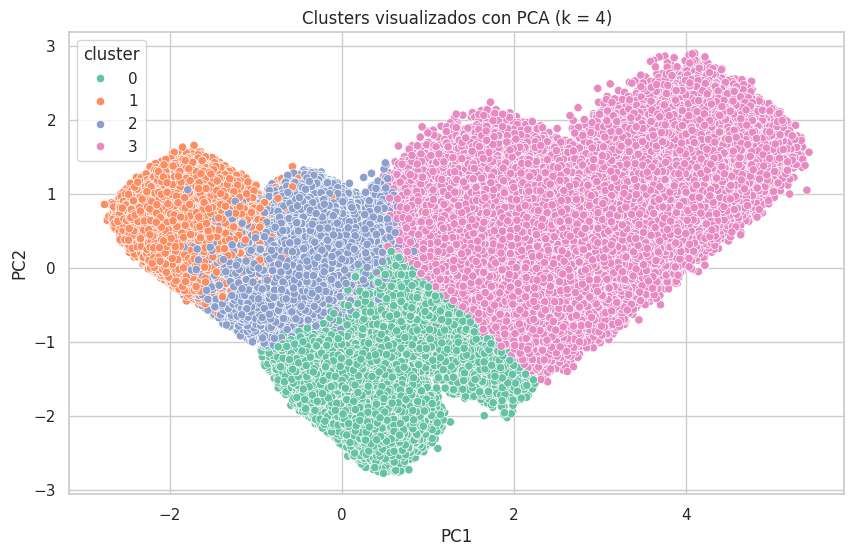

In [12]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reducir a 2 dimensiones
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_final.drop(columns='cluster'))

# Crear nuevo DataFrame para graficar
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['cluster'] = df_final['cluster'].values

# Graficar clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set2')
plt.title('Clusters visualizados con PCA (k = 4)')
plt.show()


# Árbol de decsión

In [13]:
from sklearn.model_selection import train_test_split

#  Variables predictoras (excluyendo la etiqueta 'cluster')
X = df_final.drop(columns=['cluster'])
y = df_final['cluster']

#  Dividir en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
from sklearn.tree import DecisionTreeClassifier

#  Crear y entrenar el árbol
#Se escoge profundidad igual a 3
tree_model = DecisionTreeClassifier(random_state=42, max_depth=3)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

#  Predicción
y_pred = tree_model.predict(X_val)

#  Resultados
print("Reporte de clasificación:")
print(classification_report(y_val, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     77082
           1       1.00      0.99      0.99    101450
           2       0.98      0.97      0.98    100988
           3       0.89      1.00      0.94     87147

    accuracy                           0.97    366667
   macro avg       0.97      0.96      0.96    366667
weighted avg       0.97      0.97      0.97    366667

Matriz de confusión:
[[68836     0   148  8098]
 [    2 99962  1481     5]
 [  399    26 98437  2126]
 [  103     0     0 87044]]


VARIABLES QUE EL MODELO ESCOGIO COMO MAS RELEVANTES.

In [17]:
import pandas as pd

#  Importancia de las variables
importances = pd.Series(tree_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Mostrar las 10 más importantes
print("Top 10 variables más importantes:")
display(importances.head(10))


Top 10 variables más importantes:


,0
frecuencia_compras_mensual,0.402787
ingresos_anuales,0.325047
valor_total_gastado,0.261183
valor_promedio_compra,0.010983
cantidad_compras,0.000000
edad,0.000000
dias_desde_ultima_compra,0.000000
satisfaccion_cliente,0.000000
participacion_programa_lealtad,0.000000
dispositivo_utilizado_móvil,0.000000


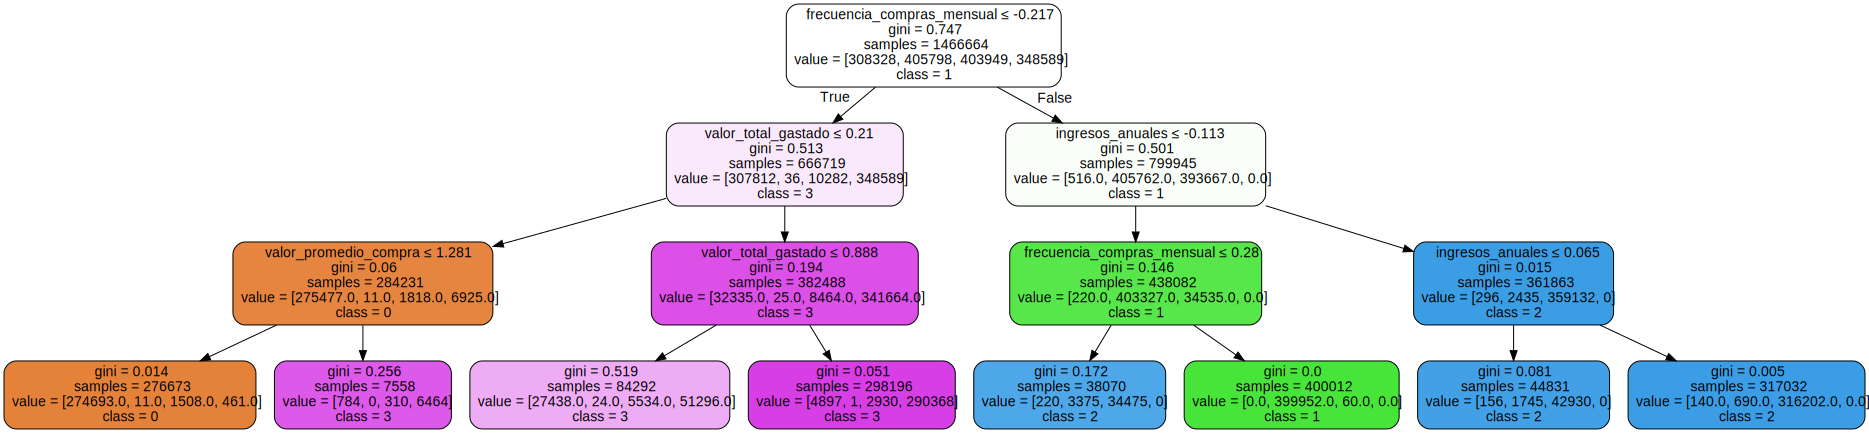

In [18]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Limitar la profundidad del árbol para visualización
tree_model_viz = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model_viz.fit(X_train, y_train)

# Exportar el árbol como archivo .dot
dot_data = export_graphviz(tree_model_viz,
                           out_file=None,
                           feature_names=X.columns,
                           class_names=[str(i) for i in sorted(y.unique())],
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Mostrar como imagen en el notebook
graph = graphviz.Source(dot_data)
graph.render("árbol_segmentación", format="png", cleanup=True)  # Guarda el archivo
graph  # Muestra el árbol




El árbol de decisión alcanzó un excelente desempeño (accuracy ~97%) al predecir correctamente los segmentos generados por K-Means. Las métricas de precision, recall y f1-score fueron muy cercanas a 1.0 para todos los clusters, lo cual indica que los grupos están claramente diferenciados en el espacio de características.

Las variables más relevantes para tomar decisiones en el árbol fueron:
- **frecuencia_compras_mensual**
- **ingresos_anuales**
- **valor_total_gastado**
- **valor_promedio_compra**

Estas características coinciden con lo esperado: los patrones de consumo y el nivel económico del cliente son altamente predictivos del segmento al que pertenece.


# Análisis con K = 6

In [19]:
df_final2 = df_final.copy()

In [21]:


# Aplicar K-Means al dataset completo
kmeans_final2 = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans_final2.fit(df_final2)

# Añadir los clusters como etiquetas
df_final2['cluster'] = kmeans_final2.labels_


In [26]:
# Conteo de instancias por cluster
cluster_counts = df_final2['cluster'].value_counts()
print("Distribución de instancias por cluster:")
print(cluster_counts)


Distribución de instancias por cluster:
cluster
1    506718
3    429748
2    344803
0    202153
4    183257
5    166652
Name: count, dtype: int64


In [27]:
# Media de cada variable por cluster
cluster_profiles = df_final2.groupby('cluster').mean(numeric_only=True)
display(cluster_profiles)


,edad,ingresos_anuales,cantidad_compras,valor_promedio_compra,frecuencia_compras_mensual,dias_desde_ultima_compra,valor_total_gastado,satisfaccion_cliente,participacion_programa_lealtad,dispositivo_utilizado_móvil,dispositivo_utilizado_tablet,fuente_trafico_email,fuente_trafico_redes sociales,productos_adquiridos_computadoras,productos_adquiridos_electrodomésticos,productos_adquiridos_móviles
cluster,,,,,,,,,,,,,,,,
0,-0.210347,0.655801,-0.344613,-0.314227,-0.611030,1.232414,-0.211272,-0.800235,0.309577,0.259788,0.337571,0.345723,0.527492,0.386193,0.047518,0.272516
1,-0.497474,-0.445784,0.874585,-0.245728,0.522225,-0.244165,-0.271771,0.596275,0.398673,0.801758,0.000243,0.000000,0.799717,0.002479,0.098814,0.304232
2,-0.014520,0.256984,0.213624,0.276987,0.062544,-0.033639,0.350330,-0.047979,0.604122,0.673559,0.095356,0.000035,0.582460,0.417453,0.010284,0.472493
3,0.720369,0.298967,-0.245824,1.446954,-0.533881,1.081132,1.988765,-0.206492,0.515502,0.096710,0.166726,0.390077,0.082832,0.367781,0.533441,0.000000
4,1.564320,-0.641046,-0.232606,-0.251247,-0.553835,0.413714,-0.209738,-0.684537,0.213503,0.005479,0.285692,0.385333,0.005075,0.342350,0.345226,0.000180
5,0.527456,1.390885,1.499861,-0.687359,0.651379,-0.197270,0.066569,-0.065764,0.699230,0.498500,0.249874,0.000000,0.499484,0.000000,0.333695,0.333623


# Interpretación de los Clusters (k = 6)
 Distribución de clientes por cluster:

Cluster 0: 202,153 clientes

Cluster 1: 506,718 clientes

Cluster 2: 344,803 clientes

Cluster 3: 429,748 clientes

Cluster 4: 183,257 clientes

Cluster 5: 166,652 clientes

 Descripción de cada cluster

Cluster 0 – “Clientes de ingresos medios y baja actividad”
Edad: Media

Ingresos: Medios

Compras: Bajas en cantidad y en valor promedio

Frecuencia: Baja, con muchas compras realizadas hace tiempo (+1.23 en días desde la última compra)

Otros datos: Baja satisfacción y participación en programas de lealtad media

Interpretación: Este grupo representa clientes con ingresos razonables, pero baja actividad de compra. Se pueden incentivar con campañas de retención y descuentos.

Cluster 1 – “Clientes jóvenes y frecuentes”
Edad: Más joven que el promedio

Ingresos: Moderados a bajos

Compras: Frecuentes, pero de bajo valor

Frecuencia: Alta

Otros datos: Alta satisfacción y fuerte uso de dispositivos móviles

Interpretación: Este grupo es muy activo, aunque gasta poco en cada compra. Son buenos candidatos para estrategias de fidelización y aumento del ticket promedio.

Cluster 2 – “Clientes moderados con ingresos estables”
Edad: Media

Ingresos: Medios

Compras: Moderadas, con un valor promedio ligeramente superior

Frecuencia: Media

Otros datos: Alta participación en programas de lealtad y fuerte uso de dispositivos móviles

Interpretación: Estos clientes son compradores activos y equilibrados. Pueden responder bien a estrategias de cross-selling y ofertas por categorías.

Cluster 3 – “Compradores ocasionales con alto gasto”
Edad: Media-alta

Ingresos: Intermedios

Compras: Poco frecuentes, pero con un alto valor por compra (+1.44)

Frecuencia: Baja, con muchos días desde la última compra

Otros datos: Baja satisfacción

Interpretación: Este segmento representa compradores de alto valor que no compran con frecuencia. Pueden beneficiarse de programas VIP y estrategias de recompra.

Cluster 4 – “Clientes mayores y de bajo consumo”
Edad: Más alta del conjunto (+1.56)

Ingresos: Bajos

Compras: Bajas en cantidad y valor

Frecuencia: Baja, aunque menos inactivos que el cluster 0

Otros datos: Baja satisfacción y uso mínimo de dispositivos móviles

Interpretación: Este segmento tiene clientes inactivos o desconectados. No son una prioridad para marketing, pero podrían responder a estrategias de reactivación.

Cluster 5 – “Clientes de alto poder adquisitivo y compras impulsivas”
Edad: Media-alta

Ingresos: Muy altos (+1.39)

Compras: Muy altas en cantidad, pero con un valor promedio bajo (-0.68)

Frecuencia: Alta

Otros datos: Alta participación en programas de lealtad

Interpretación: Este segmento es el más valioso: compran con frecuencia y tienen alto poder adquisitivo. Son ideales para estrategias premium y recomendaciones personalizadas.

 Conclusiones

Cluster 0: Clientes con ingresos medios y baja actividad. Se pueden recuperar con ofertas dirigidas.

Cluster 1: Clientes jóvenes y frecuentes. Potencial para aumentar su ticket promedio.

Cluster 2: Compradores equilibrados y leales. Pueden responder a estrategias de cross-selling.

Cluster 3: Compradores ocasionales pero de alto valor. Se pueden fidelizar con incentivos VIP.

Cluster 4: Clientes mayores e inactivos. Difícil de reactivar, pero posibles promociones de reenganche.

Cluster 5: Clientes de alto poder adquisitivo con compras frecuentes. Se deben explotar con estrategias premium

# COMPARACIÓN DE DISTRIBUCIONES ENTRE DOS VARIABLES CON CLUSTERS IGUAL A 4 Y 6

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


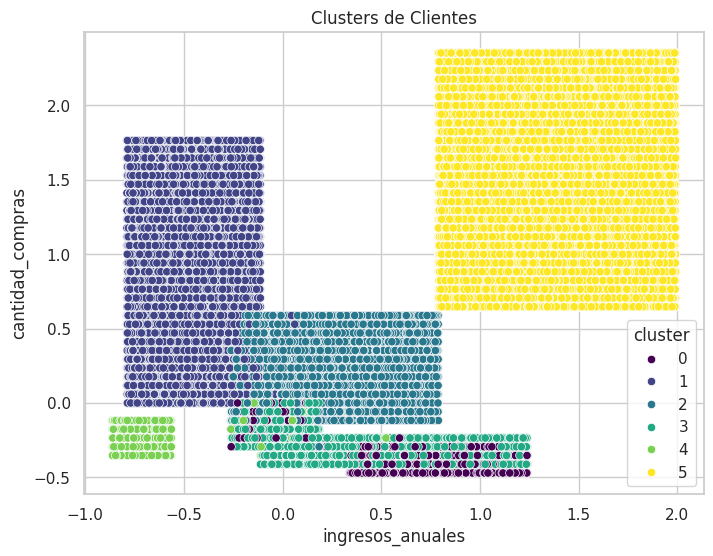

In [29]:
#  Visualizar clusters con dos variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_final2["ingresos_anuales"], y=df_final2["cantidad_compras"], hue=df_final2["cluster"], palette="viridis")
plt.title("Clusters de Clientes")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


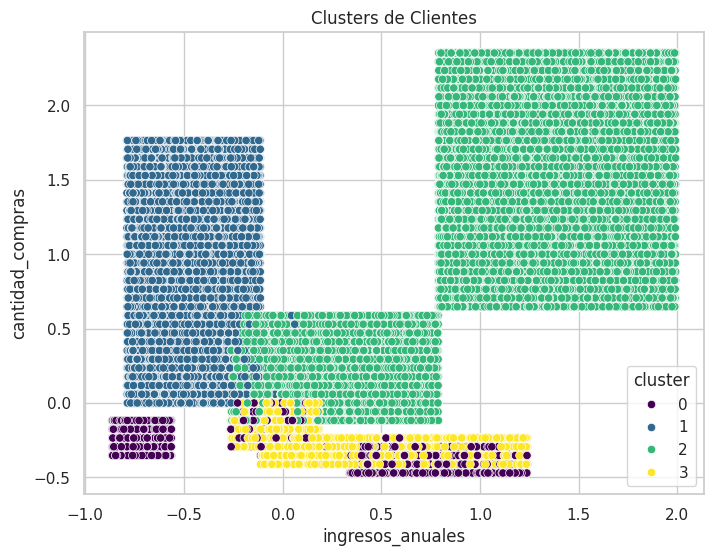

In [30]:
#  Visualizar clusters con dos variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_final["ingresos_anuales"], y=df_final["cantidad_compras"], hue=df_final["cluster"], palette="viridis")
plt.title("Clusters de Clientes")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


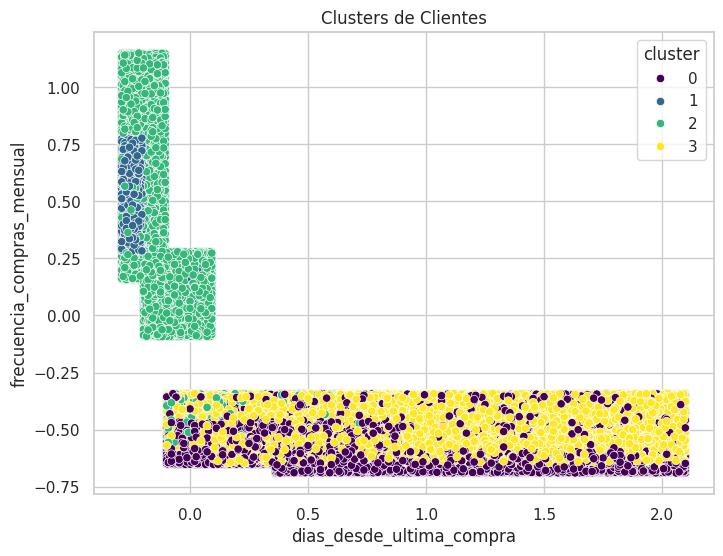

In [31]:
#  Visualizar clusters con dos variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_final["dias_desde_ultima_compra"], y=df_final["frecuencia_compras_mensual"], hue=df_final["cluster"], palette="viridis")
plt.title("Clusters de Clientes")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


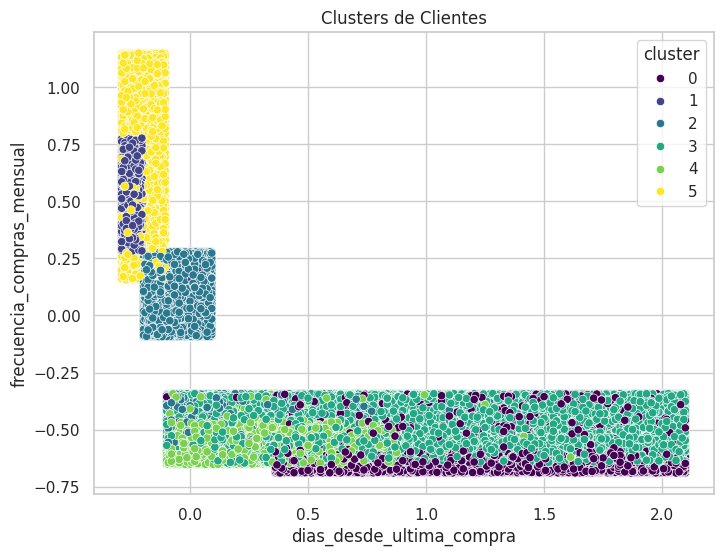

In [32]:
#  Visualizar clusters con dos variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_final2["dias_desde_ultima_compra"], y=df_final2["frecuencia_compras_mensual"], hue=df_final2["cluster"], palette="viridis")
plt.title("Clusters de Clientes")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


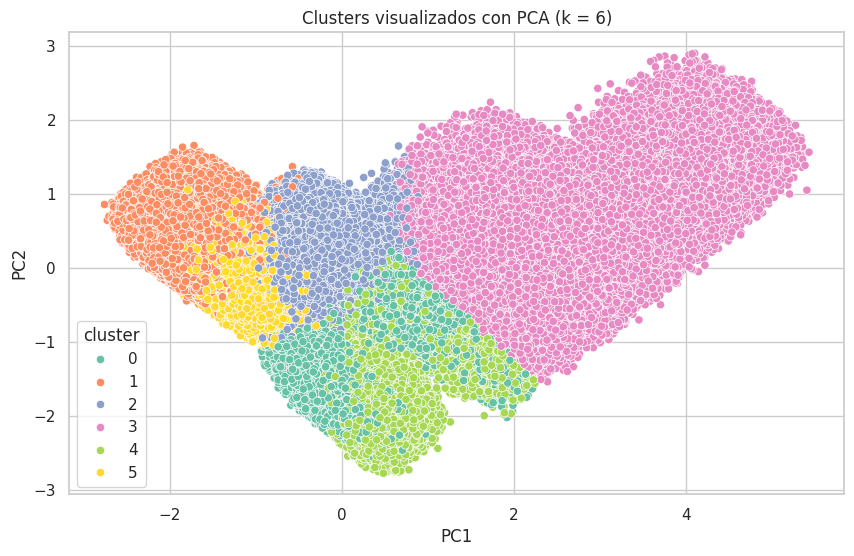

In [28]:

# Reducir a 2 dimensiones
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_final2.drop(columns='cluster'))

# Crear nuevo DataFrame para graficar
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['cluster'] = df_final2['cluster'].values

# Graficar clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set2')
plt.title('Clusters visualizados con PCA (k = 6)')
plt.show()

# Arbol de decisión con K=6

In [44]:

#  Variables predictoras (excluyendo la etiqueta 'cluster')
X = df_final2.drop(columns=['cluster'])
y = df_final2['cluster']

#  Dividir en entrenamiento y validación
X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [45]:

#  Crear y entrenar el árbol
tree_model2 = DecisionTreeClassifier(random_state=42, max_depth=5)  #
tree_model2.fit(X_train2, y_train2)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [46]:

#  Predicción
y_pred2 = tree_model2.predict(X_val2)

#  Resultados
print("Reporte de clasificación:")
print(classification_report(y_val2, y_pred2))

print("Matriz de confusión:")
print(confusion_matrix(y_val2, y_pred2))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     40431
           1       1.00      0.99      0.99    101344
           2       0.98      0.95      0.96     68961
           3       0.95      0.98      0.97     85950
           4       0.99      0.93      0.96     36651
           5       1.00      1.00      1.00     33330

    accuracy                           0.97    366667
   macro avg       0.97      0.97      0.97    366667
weighted avg       0.97      0.97      0.97    366667

Matriz de confusión:
[[38579     0    52  1522   278     0]
 [    2 99939  1403     0     0     0]
 [ 1513    12 65280  2124    32     0]
 [ 1408     0     0 84488    54     0]
 [ 1911     0    72   642 34026     0]
 [    0     0     0     0     0 33330]]


In [36]:

#  Importancia de las variables
importances = pd.Series(tree_model2.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Mostrar las 10 más importantes
print("Top 10 variables más importantes:")
display(importances.head(10))

Top 10 variables más importantes:


,0
dias_desde_ultima_compra,0.280769
frecuencia_compras_mensual,0.198492
valor_total_gastado,0.177478
edad,0.115760
ingresos_anuales,0.100711
cantidad_compras,0.096895
valor_promedio_compra,0.029444
satisfaccion_cliente,0.000451
participacion_programa_lealtad,0.000000
dispositivo_utilizado_móvil,0.000000


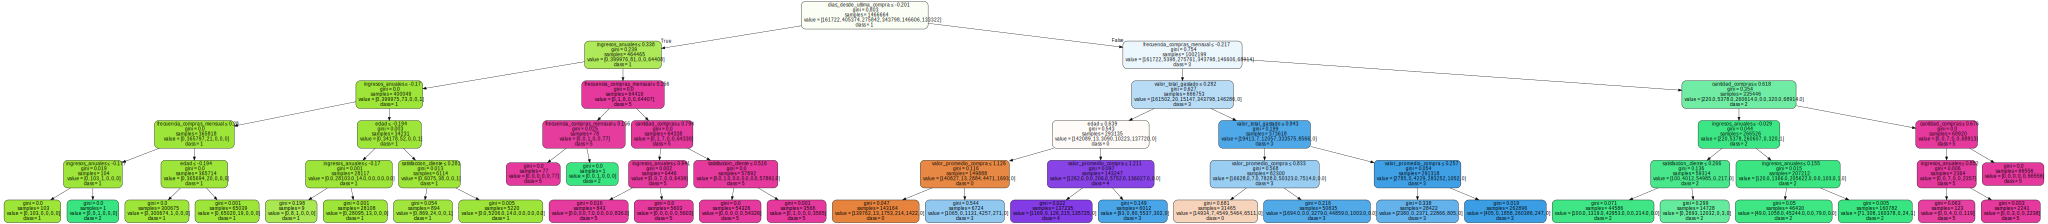

In [37]:

# Limitar la profundidad del árbol para visualización
tree_model_viz2 = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model_viz2.fit(X_train2, y_train2)

# Exportar el árbol como archivo .dot
dot_data2 = export_graphviz(tree_model_viz2,
                           out_file=None,
                           feature_names=X.columns,
                           class_names=[str(i) for i in sorted(y.unique())],
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Mostrar como imagen en el notebook
graph2 = graphviz.Source(dot_data2)
graph2.render("árbol_segmentación", format="png", cleanup=True)  # Guarda el archivo
graph2  # Muestra el árbol


# Análisis final

El desempeño del modelo con K=4 y K=6 en el árbol de decisión presenta diferencias clave en precisión, recall y la distribución de errores en la matriz de confusión.

### 1. Precisión y Recall: Diferencias en la clasificación

- **K=4** muestra una clasificación más precisa y balanceada, con un recall perfecto (1.00) en el grupo 3, lo que significa que todos los casos en ese cluster fueron correctamente identificados.
- **K=6** tiene un desempeño similar, pero la clase 0 tiene una menor precisión (0.89), lo que indica que algunos clientes de este grupo están siendo mal clasificados.
- Ambos modelos tienen alta precisión y recall, pero **K=4 mantiene valores más estables**, mientras que **K=6 muestra mayor variabilidad**.

### 2. Errores en la Matriz de Confusión

- **K=4** tiene un problema en la clase 0, donde **8,098 instancias fueron clasificadas como grupo 3**, lo que sugiere que estos dos clusters tienen similitudes y pueden estar solapándose.
- **K=6** distribuye mejor los errores, pero hay **más confusión en las clases 0 y 4**, lo que indica que con más clusters, el modelo necesita una mejor diferenciación entre clientes con hábitos similares.
- **Las clases 1 y 5 son casi perfectas en ambos casos**, lo que sugiere que estos segmentos están bien definidos en la segmentación.

### 3. Análisis de las gráficas de dispersión con 2 variables con K=4 y K=6

- En algunos casos, como en la relación entre **cantidad de compras e ingresos anuales**, existen ciertos grupos de individuos muy separados unos de otros.
- **K=6 logra segmentar mejor y diferenciar estos grupos**, como lo muestra la gráfica.

### 4. Diferencias clave en la importancia de las variables en el Árbol de decisión

 **Cambio en las variables más importantes**
- **K=4** prioriza **frecuencia de compras mensual (40.3%)**, seguida de **ingresos anuales (32.5%)** y **valor total gastado (26.1%)**.
- **K=6** redistribuye la importancia, dando más peso a **días desde la última compra (28.1%)**, mientras que **frecuencia de compras mensual (19.8%)** y **valor total gastado (17.7%)** siguen siendo relevantes.

 **¿Qué nos dice esto sobre la segmentación?**
 **Segmentación basada en ingresos vs. comportamiento reciente**  
- **K=4** enfatiza **ingresos anuales y gasto total**, lo que indica que la segmentación se basa en el **nivel económico y la estabilidad de compra**.
- **K=6** resalta **días desde la última compra y frecuencia de compra**, lo que sugiere que los clientes están siendo agrupados según su **recencia y comportamiento de compra** en lugar de factores financieros.

 **Evolución de la segmentación con más clusters**
- En **K=4**, variables como **edad y días desde la última compra** no tienen peso.
- En **K=6**, **edad, cantidad de compras y días desde la última compra** toman relevancia, indicando que con más clusters, el modelo detecta **más patrones de comportamiento individuales** en vez de enfocarse solo en ingresos.

### 5. Conclusión

- **K=4 es más estable y menos propenso a errores en la clasificación**.
- **K=6 permite una segmentación más detallada, pero con mayor riesgo de confusión en algunas clases**.

 **Si la empresa desea una clasificación más clara y confiable**, **K=4** es la mejor opción.  
 **Si se prefiere una segmentación más detallada para capturar diferencias más finas en el comportamiento del cliente**, **K=6** es la mejor elección. Esto se evidencia en el análisis de la gráfica de dispersión de cantidad de compras e ingresos anuales, donde **K=6 logró segmentar mejor los individuos**.

